In [52]:
from sklearn.datasets import fetch_openml

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np

In [54]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [55]:
from nearest_neighbors import KNNClassifier
from cross_validation import knn_cross_val_score, kfold

In [56]:
mnist = fetch_openml('mnist_784')

In [57]:
X = mnist.data
y = mnist.target

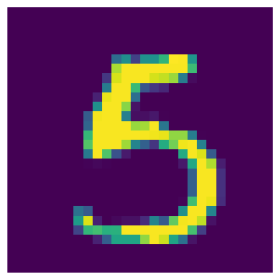

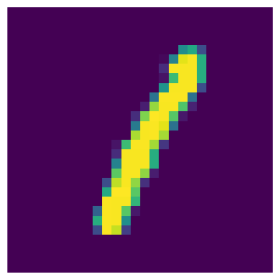

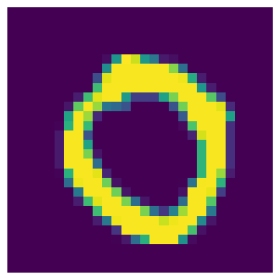

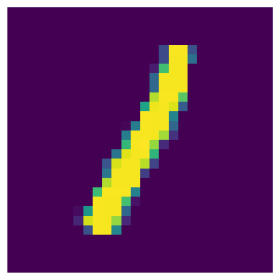

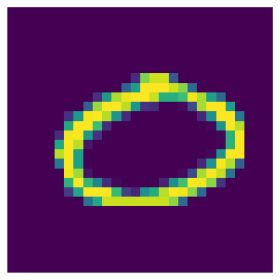

In [58]:
for im in np.array(X.sample(5)):
    plt.imshow(im.reshape(28, 28))
    plt.axis("off")
    plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
import pandas as pd

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

In [62]:
inds = {10: np.random.choice(range(784), size=10, replace=False),
          20: np.random.choice(range(784), size=20, replace=False),
          100: np.random.choice(range(784), size=100, replace=False)}

In [63]:
methods = ['kd_tree', 'ball_tree', 'brute', 'my_own']

In [13]:
time_features_values = pd.DataFrame(index = [10, 20, 100], columns=methods)

In [64]:
import time

In [15]:
for kfeatures in time_features_values.index:
    for method in time_features_values.columns:
        classifier = KNNClassifier(k=5, strategy=method, metric='euclidean', weights=False, test_block_size=1000)
        new_X = X_train.iloc[:, inds[kfeatures]]
        new_X_test = X_test.iloc[:, inds[kfeatures]]
        classifier.fit(np.array(new_X), np.array(y_train))
        start = time.time()
        classifier.find_kneighbors(np.array(new_X_test), return_distance=False)
        end = time.time()
        time_features_values.loc[kfeatures, method] = end - start

In [16]:
time_features_values

,kd_tree,ball_tree,brute,my_own
10,0.813236,1.993488,6.694603,51.900022
20,4.52404,7.905747,6.389726,57.832929
100,89.012963,91.565641,6.84185,159.078943


In [65]:
y_train = y_train.astype(int)

In [18]:
time_kneighbors_metric = pd.DataFrame(index = range(1, 11), columns = ['euclidean', 'cosine'])
accuracy_kneighbors_metric = time_kneighbors_metric.copy()
for k in range(1, 11):
    for metric in ['euclidean', 'cosine']:
        cv = kfold(y_train.size, n_folds=3)
        start = time.time()
        accuracy = knn_cross_val_score(np.array(X_train), np.array(y_train), [k], 'accuracy', cv, strategy='brute', metric=metric, weights=False, test_block_size=1000)
        end = time.time()
        time_kneighbors_metric.loc[k, metric] = end - start
        accuracy_kneighbors_metric.loc[k, metric] = accuracy[k].mean()
        print(k, metric, "time =", end - start, "accuracy =", accuracy[k].mean())

1 euclidean time = 53.05225443840027 accuracy = 0.9674666666666667
1 cosine time = 55.5768768787384 accuracy = 0.9715166666666667
2 euclidean time = 53.16116142272949 accuracy = 0.9674666666666667
2 cosine time = 56.05296230316162 accuracy = 0.9715166666666667
3 euclidean time = 53.772950410842896 accuracy = 0.9693666666666667
3 cosine time = 56.18886995315552 accuracy = 0.9729833333333332
4 euclidean time = 55.14994716644287 accuracy = 0.9702999999999999
4 cosine time = 60.73118233680725 accuracy = 0.9741000000000001
5 euclidean time = 54.44582390785217 accuracy = 0.9687166666666666
5 cosine time = 56.27056860923767 accuracy = 0.97235
6 euclidean time = 54.397125244140625 accuracy = 0.9692500000000001
6 cosine time = 56.46902346611023 accuracy = 0.9730833333333333
7 euclidean time = 54.31422543525696 accuracy = 0.9666833333333332
7 cosine time = 56.139657735824585 accuracy = 0.9709833333333333
8 euclidean time = 54.09591746330261 accuracy = 0.9672666666666667
8 cosine time = 56.765851

In [19]:
# в кросс-валидации 3 фолда, для усреднения времени делим на 3
time_kneighbors_metric /= 3

In [20]:
time_kneighbors_metric

,euclidean,cosine
1,17.684085,18.525626
2,17.720387,18.684321
3,17.924317,18.729623
4,18.383316,20.243727
5,18.148608,18.756856
6,18.132375,18.823008
7,18.104742,18.713219
8,18.031972,18.92195
9,18.125263,18.916582
10,18.090271,18.866645


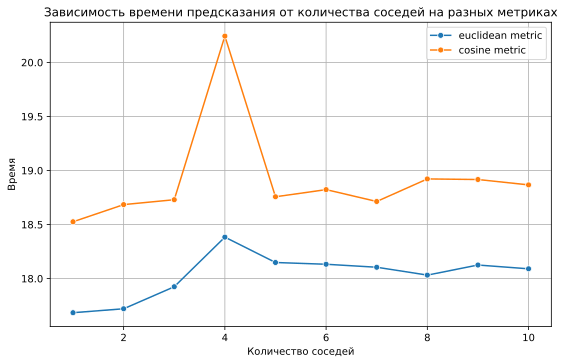

In [21]:
fig, ax = plt.subplots(figsize=(9, 5.5))
sns.lineplot(x=time_kneighbors_metric['euclidean'].index, y=time_kneighbors_metric['euclidean'].values, marker='o', label = 'euclidean metric',ax=ax)
sns.lineplot(x=time_kneighbors_metric['cosine'].index, y=time_kneighbors_metric['cosine'].values, label='cosine metric',marker='o', ax=ax)
ax.set_title('Зависимость времени предсказания от количества соседей на разных метриках')
ax.grid()
ax.set_xlabel('Количество соседей')
ax.set_ylabel('Время')
ax.legend(loc='upper right')
plt.savefig("gr1.pdf")
plt.show()

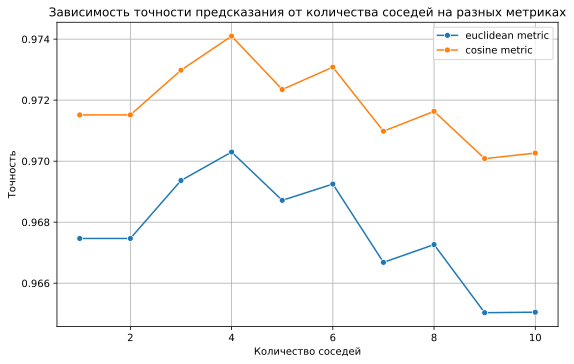

In [22]:
fig, ax = plt.subplots(figsize=(9, 5.5))
sns.lineplot(x=accuracy_kneighbors_metric['euclidean'].index, y=accuracy_kneighbors_metric['euclidean'].values, marker='o', label = 'euclidean metric',ax=ax)
sns.lineplot(x=accuracy_kneighbors_metric['cosine'].index, y=accuracy_kneighbors_metric['cosine'].values, label='cosine metric',marker='o', ax=ax)
ax.set_title('Зависимость точности предсказания от количества соседей на разных метриках')
ax.grid()
ax.set_xlabel('Количество соседей')
ax.set_ylabel('Точность')
ax.legend(loc='upper right')
plt.savefig("gr2.pdf")
plt.show()

In [23]:
weighted_time_kneighbors_metric = pd.DataFrame(index = range(1, 11), columns = ['euclidean', 'cosine'])
weighted_accuracy_kneighbors_metric = weighted_time_kneighbors_metric.copy()
for k in range(1, 11):
    for metric in ['euclidean', 'cosine']:
        cv = kfold(y_train.size, n_folds=3)
        start = time.time()
        accuracy = knn_cross_val_score(np.array(X_train), np.array(y_train), [k], 'accuracy', cv, strategy='brute', metric=metric, weights=True, test_block_size=1000)
        end = time.time()
        weighted_time_kneighbors_metric.loc[k, metric] = end - start
        weighted_accuracy_kneighbors_metric.loc[k, metric] = accuracy[k].mean()
        print(k, metric, "time =", end - start, "accuracy =", accuracy[k].mean())

1 euclidean time = 53.97891926765442 accuracy = 0.9674666666666667
1 cosine time = 55.97687792778015 accuracy = 0.9715166666666667
2 euclidean time = 53.616405963897705 accuracy = 0.9674666666666667
2 cosine time = 56.17443251609802 accuracy = 0.9715166666666667
3 euclidean time = 53.95525908470154 accuracy = 0.9693666666666667
3 cosine time = 56.51109027862549 accuracy = 0.9730666666666666
4 euclidean time = 54.515623331069946 accuracy = 0.9704
4 cosine time = 56.2846245765686 accuracy = 0.9741
5 euclidean time = 54.129145860672 accuracy = 0.96875
5 cosine time = 56.093626737594604 accuracy = 0.9726499999999999
6 euclidean time = 53.822917222976685 accuracy = 0.9694333333333334
6 cosine time = 56.309988498687744 accuracy = 0.9730333333333334
7 euclidean time = 53.97187876701355 accuracy = 0.9667666666666667
7 cosine time = 56.231581687927246 accuracy = 0.9712833333333334
8 euclidean time = 53.764726638793945 accuracy = 0.96735
8 cosine time = 56.12243628501892 accuracy = 0.97186666666

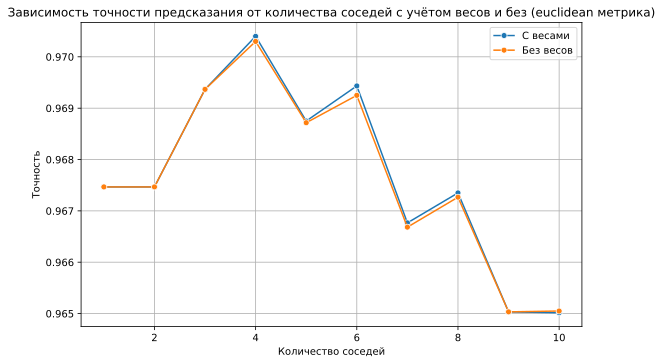

In [24]:
fig, ax = plt.subplots(figsize=(9, 5.5))
sns.lineplot(x=weighted_accuracy_kneighbors_metric['euclidean'].index, y=weighted_accuracy_kneighbors_metric['euclidean'].values, marker='o', label = 'С весами',ax=ax)
sns.lineplot(x=accuracy_kneighbors_metric['euclidean'].index, y=accuracy_kneighbors_metric['euclidean'].values, label='Без весов',marker='o', ax=ax)
ax.set_title('Зависимость точности предсказания от количества соседей с учётом весов и без (euclidean метрика)')
ax.grid()
ax.set_xlabel('Количество соседей')
ax.set_ylabel('Точность')
ax.legend(loc='upper right')
plt.savefig("gr3.pdf")
plt.show()

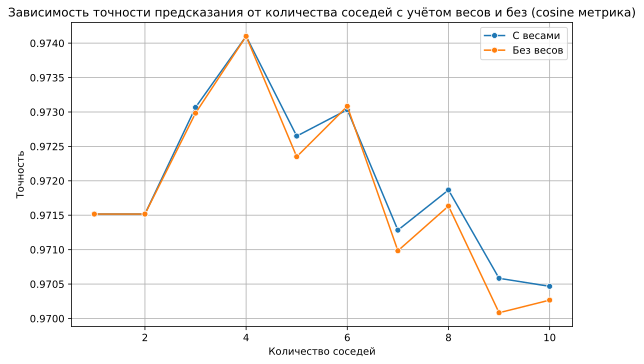

In [25]:
fig, ax = plt.subplots(figsize=(9, 5.5))
sns.lineplot(x=weighted_accuracy_kneighbors_metric['cosine'].index, y=weighted_accuracy_kneighbors_metric['cosine'].values, marker='o', label = 'С весами',ax=ax)
sns.lineplot(x=accuracy_kneighbors_metric['cosine'].index, y=accuracy_kneighbors_metric['cosine'].values, label='Без весов',marker='o', ax=ax)
ax.set_title('Зависимость точности предсказания от количества соседей с учётом весов и без (cosine метрика)')
ax.grid()
ax.set_xlabel('Количество соседей')
ax.set_ylabel('Точность')
ax.legend(loc='upper right')
plt.savefig("gr4.pdf")
plt.show()

In [66]:
classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
classifier.fit(np.array(X_train), np.array(y_train))
y_pred = classifier.predict(np.array(X_test))

In [67]:
y_test = y_test.astype(int)

In [68]:
best_params_test_accuracy = np.sum(y_pred == y_test) / y_test.size

In [69]:
best_params_test_accuracy

np.float64(0.9759)

In [70]:
best_params_cv_accuracy = accuracy_kneighbors_metric.loc[4, 'cosine']

In [31]:
print("Точности при лучших параметрах:")
print("На тестовых данных:", best_params_test_accuracy)
print("На кросс-валидации:", best_params_cv_accuracy)

Точности при лучших параметрах:
На тестовых данных: 0.9759
На кросс-валидации: 0.9741000000000001


In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
conf_matr = confusion_matrix(y_test, y_pred)

In [73]:
ln_conf_matr = np.log1p(conf_matr)

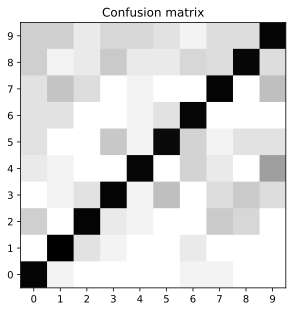

In [74]:
ax = plt.subplot(1, 1, 1)
ax.imshow(ln_conf_matr, cmap="Greys")
ax.invert_yaxis()
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_title('Confusion matrix')
plt.savefig("gr5.pdf")
plt.show()

In [75]:
conf_matr_2 = conf_matr

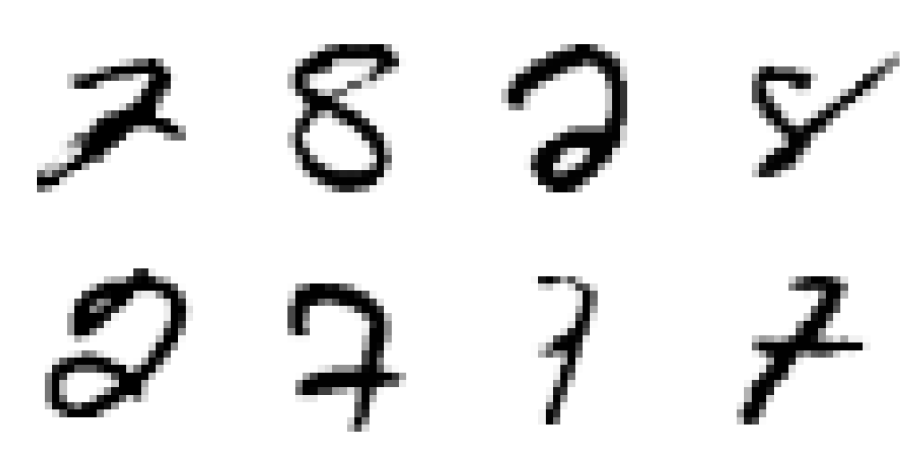

In [42]:
X_vis = X_test[y_pred != y_test].sample(8)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()
for i in range(8):
    axes[i].imshow(np.array(X_vis)[i].reshape(28, 28), cmap="Greys")
    axes[i].axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig("errors2_img.pdf")
plt.show()

In [76]:
import cv2
import PIL
import skimage.io

In [57]:
test_img = np.array(X_train.iloc[1501]).reshape(28, 28)

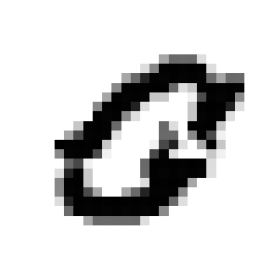

In [58]:
plt.imshow(test_img, cmap="Greys")
plt.axis("off")
plt.show()

In [63]:
ti = test_img.astype(np.uint8)
#cv.imshow('Grayscale Image', ti)

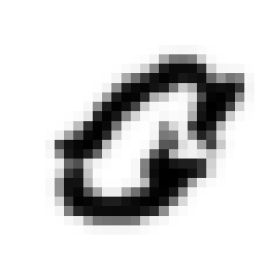

In [62]:
#cv.GaussianBlur(ti, (5, 5), 1)
plt.imshow(cv2.GaussianBlur(ti, (5, 5), 0.5), cmap="Greys")
plt.axis("off")
plt.show()

In [81]:
import scipy

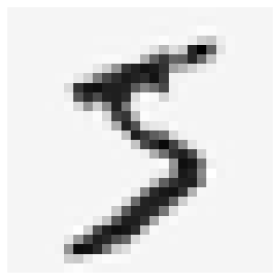

In [54]:
imn = scipy.ndimage.rotate(np.array(X.iloc[0]).reshape(28, 28), 10, reshape=False)
plt.imshow(imn, cmap="Greys")
plt.axis("off")
plt.show()


**Кросс-валидация для разных углов**

In [41]:
n_new = 30000
transform_inds = np.random.choice(np.arange(60000), size=n_new, replace=False)
print(transform_inds)
for angle in [-15, -10, -5, 5, 10, 15]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        X_add[j] = scipy.ndimage.rotate(X_train.to_numpy()[i].reshape(28, 28), angle, reshape=False).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Angle =", angle, ", Accuracy =", accuracy[4].mean())


[  669 18762 32419 ...  4914 27257 38873]
Finished processing images
Angle = -15 , Accuracy = 0.9654777777777778
Finished processing images
Angle = -10 , Accuracy = 0.9787111111111111
Finished processing images
Angle = -5 , Accuracy = 0.9848777777777779
Finished processing images
Angle = 5 , Accuracy = 0.9844777777777778
Finished processing images
Angle = 10 , Accuracy = 0.9785222222222222
Finished processing images
Angle = 15 , Accuracy = 0.9655555555555555


**Кросс-валидация для разных смещений** (по оси X)

In [45]:
n_new = 30000
transform_inds = np.random.choice(np.arange(60000), size=n_new, replace=False)
print(transform_inds)
for x_shift in [-3, -2, -1, 1, 2, 3]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        X_add[j] = scipy.ndimage.shift(X_train.to_numpy()[i].reshape(28, 28), (x_shift, 0)).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("X_shift =", x_shift, ", Accuracy =", accuracy[4].mean())


[ 6847 36222 46821 ... 42205 41916 15994]
Finished processing images
X_shift = -3 , Accuracy = 0.8250666666666667
Finished processing images
X_shift = -2 , Accuracy = 0.9220555555555555
Finished processing images
X_shift = -1 , Accuracy = 0.9770111111111112
Finished processing images
X_shift = 1 , Accuracy = 0.9778777777777777
Finished processing images
X_shift = 2 , Accuracy = 0.9259333333333334
Finished processing images
X_shift = 3 , Accuracy = 0.832011111111111


**Кросс-валидация для разных смещений** (по оси Y)

In [46]:
n_new = 30000
transform_inds = np.random.choice(np.arange(60000), size=n_new, replace=False)
print(transform_inds)
for y_shift in [-3, -2, -1, 1, 2, 3]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        X_add[j] = scipy.ndimage.shift(X_train.to_numpy()[i].reshape(28, 28), (0, y_shift)).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Y_shift =", y_shift, ", Accuracy =", accuracy[4].mean())


[36224 20482 46577 ...  1543 41363 41212]
Finished processing images
Y_shift = -3 , Accuracy = 0.8074222222222223
Finished processing images
Y_shift = -2 , Accuracy = 0.9131222222222223
Finished processing images
Y_shift = -1 , Accuracy = 0.9753555555555556
Finished processing images
Y_shift = 1 , Accuracy = 0.9753
Finished processing images
Y_shift = 2 , Accuracy = 0.9119666666666667
Finished processing images
Y_shift = 3 , Accuracy = 0.8433555555555555


**Кросс-валидация со смешанными сдвигами по осям (сдвиги выберем случайно для всех новых элементов**

In [48]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        x_shift = np.random.choice([-1, 1])
        y_shift = np.random.choice([-1, 1])
        X_add[j] = scipy.ndimage.shift(X_train.to_numpy()[i].reshape(28, 28), (x_shift, y_shift)).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with random shifts =", accuracy[4].mean())

Finished processing images
Accuracy with random shifts = 0.9567444444444444


Отсюда вывод, что по двум осям сразу лучше не сдвигать

А теперь попробуем лучшие углы с лучшими сдвигами по каждой из осей (сдвиги возьмём случайно).

**Углы + сдвиги по оси X**

In [49]:
n_new = 30000
transform_inds = np.random.choice(np.arange(60000), size=n_new, replace=False)
print(transform_inds)
for (angle, x_shift) in [(-5, -1), (-5, 1), (5, -1), (5, 1)]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        X_add[j] = scipy.ndimage.shift(scipy.ndimage.rotate(X_train.to_numpy()[i].reshape(28, 28), angle, reshape=False), (x_shift, 0)).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Angle =", angle, ", X_shift =", x_shift, ", Accuracy =", accuracy[4].mean())


[13883 29480 54004 ...   321 42033  7812]
Finished processing images
Angle = -5 , X_shift = -1 , Accuracy = 0.9737111111111112
Finished processing images
Angle = -5 , X_shift = 1 , Accuracy = 0.9739555555555556
Finished processing images
Angle = 5 , X_shift = -1 , Accuracy = 0.9726111111111111
Finished processing images
Angle = 5 , X_shift = 1 , Accuracy = 0.9755777777777778


Результаты совсем неинтересные, тестирование со сдвигами по y решено не проверять.

Будем распределять количество добавочных элементов для каждого преобразования сообразно улучшению точности на кросс-валидации от этого преобразования (или совокупности преобразований).

**Кросс-валидация с разными дисперсиями фильтра Гаусса**

In [64]:
n_new = 30000
transform_inds = np.random.choice(np.arange(60000), size=n_new, replace=False)
print(transform_inds)
for deviation in [0.5, 1, 1.5]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        X_add[j] = cv2.GaussianBlur(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), (5, 5), deviation).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Standard deviation =", deviation, ", Accuracy =", accuracy[4].mean())

[26233 48563 15447 ... 34578 27901 50971]
Finished processing images
Standard deviation = 0.5 , Accuracy = 0.9853111111111111
Finished processing images
Standard deviation = 1 , Accuracy = 0.9844666666666667
Finished processing images
Standard deviation = 1.5 , Accuracy = 0.9774111111111111


Будем брать только 0.5

**Эррозия**:

In [67]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        kernel = np.ones((2, 2))
        X_add[j] = cv2.erode(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), kernel, iterations = 1).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with erosion =", accuracy[4].mean())

Finished processing images
Accuracy with erosion = 0.9742666666666667


**Эррозия с последующим гауссовым фильтром 😈**

In [69]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        kernel = np.ones((2, 2))
        X_add[j] = cv2.GaussianBlur(cv2.erode(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), kernel, iterations = 1), (5, 5), 0.5).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with erosion and gauss blur =", accuracy[4].mean())

Finished processing images
Accuracy with erosion and gauss blur = 0.9774777777777777


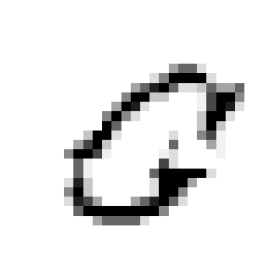

In [76]:
kernel = np.ones((2, 2))
imn = cv2.erode(np.array(X.iloc[1501]).reshape(28, 28).astype(np.uint8), kernel, iterations=1)
plt.imshow(imn, cmap="Greys")
plt.axis("off")
plt.show()

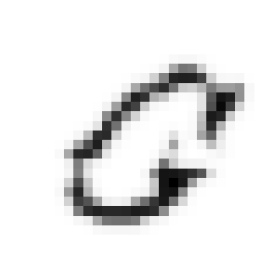

In [79]:
kernel = np.ones((2, 2))
imn = np.array(X.iloc[1501]).reshape(28, 28).astype(np.uint8)
kernel = np.ones((2, 2))
imn = cv2.erode(imn, kernel, iterations=1)
imn = cv2.GaussianBlur(imn, (5, 5), 0.5)
plt.imshow(imn, cmap="Greys")
plt.axis("off")
plt.show()

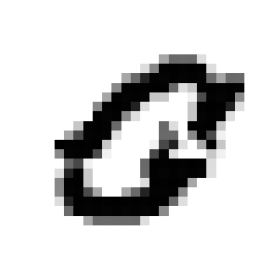

In [77]:
kernel = np.ones((2, 2))
imn = np.array(X.iloc[1501]).reshape(28, 28).astype(np.uint8)
plt.imshow(imn, cmap="Greys")
plt.axis("off")
plt.show()

**Дилатация**

In [80]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        kernel = np.ones((2, 2))
        X_add[j] = cv2.dilate(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), kernel, iterations = 1).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with dilation =", accuracy[4].mean())

Finished processing images
Accuracy with dilation = 0.9782888888888889


**Дилатация с гауссовым фильтром**

In [82]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        kernel = np.ones((2, 2))
        X_add[j] = cv2.GaussianBlur(cv2.dilate(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), kernel, iterations = 1), (5, 5), 0.5).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with dilation and gauss blur =", accuracy[4].mean())

Finished processing images
Accuracy with dilation and gauss blur = 0.9768555555555555


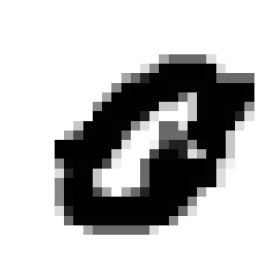

In [91]:
kernel = np.ones((2, 2))
imn = cv2.dilate(np.array(X.iloc[1501]).reshape(28, 28).astype(np.uint8), kernel, iterations=1)
plt.imshow(imn, cmap="Greys")
plt.axis("off")
plt.show()

Открытие, закрытие, сочетания с Гауссовым блюром

In [87]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        kernel = np.ones((2, 2)) / 2
        X_add[j] = cv2.morphologyEx(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), cv2.MORPH_OPEN, kernel).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with opening =", accuracy[4].mean())

Finished processing images
Accuracy with opening = 0.9405666666666667


In [84]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        kernel = np.ones((2, 2))
        X_add[j] = cv2.morphologyEx(cv2.GaussianBlur(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), (5, 5), 0.5), cv2.MORPH_OPEN, kernel).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with opening after gauss blur =", accuracy[4].mean())

Finished processing images
Accuracy with opening after gauss blur = 0.9452444444444446


In [86]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        kernel = np.ones((2, 2))
        X_add[j] = cv2.GaussianBlur(cv2.morphologyEx(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), cv2.MORPH_OPEN, kernel), (5, 5), 0.5).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with opening and gauss blur =", accuracy[4].mean())

Finished processing images
Accuracy with opening and gauss blur = 0.9437222222222221


In [85]:
for i in [1]:
    X_add = np.zeros((X_train.shape[0] // 2, X_train.shape[1]))
    y_add = np.zeros(y_train.size // 2)
    j = 0
    for i in transform_inds:
        kernel = np.ones((2, 2))
        X_add[j] = cv2.morphologyEx(X_train.to_numpy()[i].reshape(28, 28).astype(np.uint8), cv2.MORPH_CLOSE, kernel).reshape(784,)
        y_add[j] = y_train[i]
        j += 1
    print("Finished processing images")
    X_add = np.vstack([X_train, X_add])
    y_add = np.append(y_train, y_add)
    cv = kfold(y_add.size, n_folds=3)
    accuracy = knn_cross_val_score(X_add, y_add, [4], 'accuracy', cv, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
    print("Accuracy with closing =", accuracy[4].mean())

Finished processing images
Accuracy with closing = 0.9424222222222222


Открытие и закрытие явно неэффективны, применять будем только эррозию + фильтр Гаусса и дилатацию.

**Создание дополнений к выборке (сдвиги и повороты):**

In [77]:
np.random.seed(58)
aug_ind = np.random.choice(np.arange(60000), size=60000, replace=False)
rot5_ind = aug_ind[: 10000]
rot10_ind = aug_ind[10000: 30000]
shiftx_ind = aug_ind[30000: 40000]
shifty_ind = aug_ind[40000: ]

In [78]:
aug_ind2 = np.random.choice(np.arange(60000), size=60000, replace=False)
errgauss_ind = aug_ind2[: 20000]
dilat_ind = aug_ind2[20000 :]

In [79]:
X_train = X_train.to_numpy()

In [82]:
X_aug_rot5 = np.zeros((rot5_ind.size, X_train.shape[1]))
y_aug_rot5 = np.zeros(rot5_ind.size)
j = 0
for i in rot5_ind:
    X_aug_rot5[j] = scipy.ndimage.rotate(X_train[i].reshape(28, 28), np.random.choice([5, -5]), reshape=False).reshape(784,)
    y_aug_rot5[j] = y_train[i]
    j += 1

In [83]:
X_aug_rot10 = np.zeros((rot10_ind.size, X_train.shape[1]))
y_aug_rot10 = np.zeros(rot10_ind.size)
j = 0
for i in rot10_ind:
    X_aug_rot10[j] = scipy.ndimage.rotate(X_train[i].reshape(28, 28), np.random.choice([10, -10]), reshape=False).reshape(784,)
    y_aug_rot10[j] = y_train[i]
    j += 1

In [84]:
X_aug_shiftx = np.zeros((shiftx_ind.size, X_train.shape[1]))
y_aug_shiftx = np.zeros(shiftx_ind.size)
j = 0
for i in shiftx_ind:
    X_aug_shiftx[j] = scipy.ndimage.shift(X_train[i].reshape(28, 28), (np.random.choice([-1, 1]), 0)).reshape(784,)
    y_aug_shiftx[j] = y_train[i]
    j += 1

In [85]:
X_aug_shifty = np.zeros((shifty_ind.size, X_train.shape[1]))
y_aug_shifty = np.zeros(shifty_ind.size)
j = 0
for i in shifty_ind:
    X_aug_shifty[j] = scipy.ndimage.shift(X_train[i].reshape(28, 28), (0, np.random.choice([-1, 1]))).reshape(784,)
    y_aug_shifty[j] = y_train[i]
    j += 1

In [86]:
X_aug_errgauss = np.zeros((errgauss_ind.size, X_train.shape[1]))
y_aug_errgauss = np.zeros(errgauss_ind.size)
j = 0
for i in errgauss_ind:
    kernel = np.ones((2, 2))
    X_aug_errgauss[j] = cv2.GaussianBlur(cv2.erode(X_train[i].reshape(28, 28).astype(np.uint8), kernel, iterations = 1), (5, 5), 0.5).reshape(784,)
    y_aug_errgauss[j] = y_train[i]
    j += 1

In [87]:
X_aug_dilat = np.zeros((dilat_ind.size, X_train.shape[1]))
y_aug_dilat = np.zeros(dilat_ind.size)
j = 0
for i in errgauss_ind:
    kernel = np.ones((2, 2))
    X_aug_dilat[j] = cv2.dilate(X_train[i].reshape(28, 28).astype(np.uint8), kernel, iterations = 1).reshape(784,)
    y_aug_dilat[j] = y_train[i]
    j += 1

Освежим в памяти старую версию матрицы ошибок:

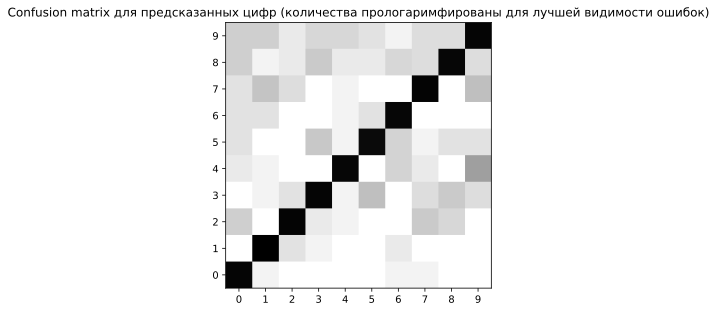

In [88]:
ax = plt.subplot(1, 1, 1)
ax.imshow(ln_conf_matr, cmap="Greys")
ax.invert_yaxis()
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_title('Confusion matrix для предсказанных цифр (количества прологаримфированы для лучшей видимости ошибок)')
plt.show()

А теперь будем добавлять по одной части аугментации и для каждой смотреть на точность и матрицу ошибок:

In [89]:
X_train = np.vstack([X_train, X_aug_rot5])

In [90]:
y_train = np.append(y_train, y_aug_rot5)

In [91]:
classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
classifier.fit(np.array(X_train), np.array(y_train))
y_pred = classifier.predict(np.array(X_test))
accuracy = np.sum(y_pred == y_test) / y_test.size

In [92]:
accuracy

np.float64(0.9752)

In [93]:
X_train = np.vstack([X_train, X_aug_rot10])
y_train = np.append(y_train, y_aug_rot10)

In [94]:
classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
classifier.fit(np.array(X_train), np.array(y_train))
y_pred = classifier.predict(np.array(X_test))
accuracy = np.sum(y_pred == y_test) / y_test.size
accuracy

np.float64(0.9777)

In [95]:
X_train = np.vstack([X_train, X_aug_shiftx])
y_train = np.append(y_train, y_aug_shiftx)

In [96]:
classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
classifier.fit(np.array(X_train), np.array(y_train))
y_pred = classifier.predict(np.array(X_test))
accuracy = np.sum(y_pred == y_test) / y_test.size
accuracy

np.float64(0.978)

In [97]:
X_train = np.vstack([X_train, X_aug_shifty])
y_train = np.append(y_train, y_aug_shifty)

In [98]:
classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
classifier.fit(np.array(X_train), np.array(y_train))
y_pred = classifier.predict(np.array(X_test))
accuracy = np.sum(y_pred == y_test) / y_test.size
accuracy

np.float64(0.978)

In [99]:
X_train = np.vstack([X_train, X_aug_errgauss])
y_train = np.append(y_train, y_aug_errgauss)

In [100]:
classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
classifier.fit(np.array(X_train), np.array(y_train))
y_pred = classifier.predict(np.array(X_test))
accuracy = np.sum(y_pred == y_test) / y_test.size
accuracy

np.float64(0.9783)

In [101]:
X_train = np.vstack([X_train, X_aug_dilat])
y_train = np.append(y_train, y_aug_dilat)

In [102]:
classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
classifier.fit(np.array(X_train), np.array(y_train))
y_pred = classifier.predict(np.array(X_test))
accuracy = np.sum(y_pred == y_test) / y_test.size
accuracy

np.float64(0.9799)

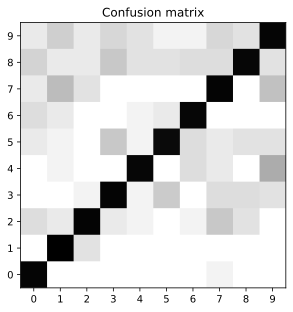

In [111]:
conf_matr = confusion_matrix(y_test, y_pred)
ln_conf_matr = np.log1p(conf_matr)
ax = plt.subplot(1, 1, 1)
ax.imshow(ln_conf_matr, cmap="Greys")
ax.invert_yaxis()
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_title('Confusion matrix')
plt.savefig('Final_matr.pdf')
plt.show()

In [114]:
accuracy - best_params_test_accuracy

np.float64(0.0040000000000000036)

In [55]:
X_train.shape

(180000, 784)

**Эксперимент 6**

In [115]:
X_test = X_test.to_numpy()

In [116]:
X_test_errgauss = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    kernel = np.ones((2, 2))
    X_test_errgauss[i] = cv2.GaussianBlur(cv2.erode(X_test[i].reshape(28, 28).astype(np.uint8), kernel, iterations = 1), (5, 5), 0.5).reshape(784,)

In [117]:
X_test_errgauss.shape

(10000, 784)

In [119]:
X_test_dilat = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    kernel = np.ones((2, 2))
    X_test_dilat[i] = cv2.dilate(X_test[i].reshape(28, 28).astype(np.uint8), kernel, iterations = 1).reshape(784,)

In [120]:
X_test_rot5 = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    X_test_rot5[i] = scipy.ndimage.rotate(X_test[i].reshape(28, 28), np.random.choice([5, -5]), reshape=False).reshape(784,)

In [121]:
X_test_rot10 = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    X_test_rot10[i] = scipy.ndimage.rotate(X_test[i].reshape(28, 28), np.random.choice([10, -10]), reshape=False).reshape(784,)

In [122]:
X_test_shiftx = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    X_test_shiftx[i] = scipy.ndimage.shift(X_test[i].reshape(28, 28), (np.random.choice([-1, 1]), 0)).reshape(784,)

In [123]:
X_test_shifty = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    X_test_shifty[i] = scipy.ndimage.shift(X_test[i].reshape(28, 28), (0, np.random.choice([-1, 1]))).reshape(784,)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

In [125]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [126]:
classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=False, test_block_size=1000)
classifier.fit(np.array(X_train), np.array(y_train))

In [127]:
y_pred = classifier.predict(np.array(X_test))
accuracy = np.sum(y_pred == y_test) / y_test.size
accuracy

np.float64(0.9759)

In [128]:
y_pred_errgauss = classifier.predict(np.array(X_test_errgauss))

In [129]:
y_pred_dilat = classifier.predict(np.array(X_test_dilat))

In [130]:
y_pred_rot5 = classifier.predict(np.array(X_test_rot5))

In [131]:
y_pred_rot10 = classifier.predict(np.array(X_test_rot10))

In [132]:
y_pred_shiftx = classifier.predict(np.array(X_test_shiftx))

In [133]:
y_pred_shifty = classifier.predict(np.array(X_test_shifty))

In [134]:
pred_matrix = np.array([])
pred_matrix.shape = (y_pred.size, 0)
pred_matrix = np.hstack([pred_matrix, y_pred[..., np.newaxis]])

In [135]:
pred_matrix = np.hstack([pred_matrix, y_pred_errgauss[..., np.newaxis]])

In [136]:
pred_matrix = np.hstack([pred_matrix, y_pred_dilat[..., np.newaxis]])
pred_matrix = np.hstack([pred_matrix, y_pred_rot5[..., np.newaxis]])
pred_matrix = np.hstack([pred_matrix, y_pred_rot10[..., np.newaxis]])
pred_matrix = np.hstack([pred_matrix, y_pred_shiftx[..., np.newaxis]])
pred_matrix = np.hstack([pred_matrix, y_pred_shifty[..., np.newaxis]])

In [137]:
final_pred = np.zeros(y_pred.size)
for i in range(y_pred.size):
    values, counts = np.unique(pred_matrix[i], return_counts=True)
    max_ind = np.argmax(counts)
    final_pred[i] = values[max_ind]

In [138]:
final_pred

array([7., 2., 1., ..., 4., 5., 6.])

In [139]:
accuracy = np.sum(final_pred == y_test) / y_test.size
accuracy

np.float64(0.9771)

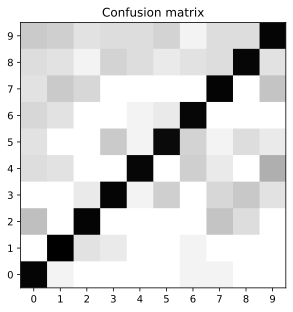

In [142]:
conf_matr = confusion_matrix(y_test, final_pred)
ln_conf_matr = np.log1p(conf_matr)
ax = plt.subplot(1, 1, 1)
ax.imshow(ln_conf_matr, cmap="Greys")
ax.invert_yaxis()
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_title('Confusion matrix')
plt.savefig("conf_6.pdf")
plt.show()